Consider the hepatitis/ pima-indians-diabetes csv file, perform the following date pre-processing.
1. Load data in Pandas.
2. Drop columns that aren’t useful.
3. Drop rows with missing values.
4. Create dummy variables.
5. Take care of missing data.
6. Convert the data frame to NumPy.
7. Divide the data set into training data and test data.

In [1]:
#1
import numpy as np
import pandas as pd
df=pd.read_csv('diabetes_csv.csv')
print(df)
list(df.columns.values)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [2]:
#2
import numpy as np
import pandas as pd
df=pd.read_csv('diabetes_csv.csv')
df.drop(['BloodPressure', 'SkinThickness','DiabetesPedigreeFunction'],axis=1, inplace=True)
print(df)
list(df.columns.values)

     Pregnancies  Glucose  Insulin   BMI  Age  Outcome
0              6      148        0  33.6   50        1
1              1       85        0  26.6   31        0
2              8      183        0  23.3   32        1
3              1       89       94  28.1   21        0
4              0      137      168  43.1   33        1
..           ...      ...      ...   ...  ...      ...
763           10      101      180  32.9   63        0
764            2      122        0  36.8   27        0
765            5      121      112  26.2   30        0
766            1      126        0  30.1   47        1
767            1       93        0  30.4   23        0

[768 rows x 6 columns]


['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']

In [3]:
#3 ,4 & 5
df = df[df!=0]
df = df.dropna( subset = df.columns.difference(['Outcome']))
df = df.fillna(0)
print(df)
pd.get_dummies(df['Outcome'])

     Pregnancies  Glucose  Insulin   BMI  Age  Outcome
3            1.0     89.0     94.0  28.1   21      0.0
6            3.0     78.0     88.0  31.0   26      1.0
8            2.0    197.0    543.0  30.5   53      1.0
13           1.0    189.0    846.0  30.1   59      1.0
14           5.0    166.0    175.0  25.8   51      1.0
..           ...      ...      ...   ...  ...      ...
751          1.0    121.0     74.0  39.0   28      0.0
755          1.0    128.0    110.0  36.5   37      1.0
760          2.0     88.0     16.0  28.4   22      0.0
763         10.0    101.0    180.0  32.9   63      0.0
765          5.0    121.0    112.0  26.2   30      0.0

[336 rows x 6 columns]


,0.0,1.0
3,1,0
6,0,1
8,0,1
13,0,1
14,0,1
...,...,...
751,1,0
755,0,1
760,1,0
763,1,0


In [4]:
df.notnull()

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
3,True,True,True,True,True,True
6,True,True,True,True,True,True
8,True,True,True,True,True,True
13,True,True,True,True,True,True
14,True,True,True,True,True,True
...,...,...,...,...,...,...
751,True,True,True,True,True,True
755,True,True,True,True,True,True
760,True,True,True,True,True,True
763,True,True,True,True,True,True


In [5]:
#6
arr = df.to_numpy(dtype='int')
print(arr)

[[  1  89  94  28  21   0]
 [  3  78  88  31  26   1]
 [  2 197 543  30  53   1]
 ...
 [  2  88  16  28  22   0]
 [ 10 101 180  32  63   0]
 [  5 121 112  26  30   0]]


In [6]:
#7. Divide the data set into training data and test data.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
     Pregnancies  Glucose  Insulin   BMI  Age
765          5.0    121.0    112.0  26.2   30
540          8.0    100.0    215.0  39.4   43
95           6.0    144.0    228.0  33.9   40
500          2.0    117.0     71.0  25.2   21
519          6.0    129.0    326.0  19.6   60

X_test : 
     Pregnancies  Glucose  Insulin   BMI  Age
128          1.0    117.0    145.0  34.5   40
126          3.0    120.0    135.0  42.9   30
638          7.0     97.0     91.0  40.9   32
620          2.0    112.0    160.0  38.4   28
457          5.0     86.0     71.0  30.2   24

y_train : 
765    0.0
540    1.0
95     0.0
500    0.0
519    0.0
Name: Outcome, dtype: float64

y_test : 
128    1.0
126    0.0
638    1.0
620    0.0
457    0.0
Name: Outcome, dtype: float64


2. Consider the diabetes csv file, create the regression model display the co-efficients (B0-intercept and B1-Slope), RMSE and predict the response. Plot the graph x v/s y in yellow and x v/s prediction in green.

In [7]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
df1=pd.DataFrame(df,columns=['Insulin','Age'])

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
     Insulin
765    112.0
540    215.0
95     228.0
500     71.0
519    326.0

X_test : 
     Insulin
128    145.0
126    135.0
638     91.0
620    160.0
457     71.0

y_train : 
765    30
540    43
95     40
500    21
519    60
Name: Age, dtype: int64

y_test : 
128    40
126    30
638    32
620    28
457    24
Name: Age, dtype: int64


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

ypredict= model.intercept_ + model.coef_*X_train
mse=mean_squared_error(y_train,ypredict)

rsme=math.sqrt(mse)
print('rmse',rsme)

coefficient of determination: 0.056392440838723745
intercept: 28.65263802345012
slope: [0.0206963]
rmse 10.231067461761933


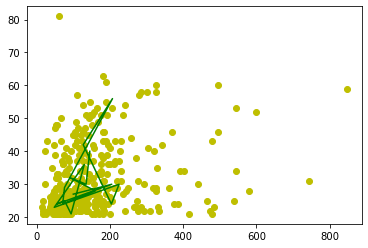

In [9]:
plt.scatter(X_train,y_train,color='y',marker='o')
plt.plot(X_test,y_test,color='g')


In [10]:
import pandas as pd
import numpy as np
#1
data=pd.read_csv('hepatitis_csv.csv')
#2
data=data.drop(columns=['protime'])
#3
data=data.dropna()
#4
data=pd.get_dummies(data)
#5
data=data.fillna(data.mean())
#6
numpy_data=data.to_numpy()
#7
X=numpy_data[:,:-1]
y=numpy_data[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(data)
print(X_train)

     age  antivirals  bilirubin  alk_phosphate   sgot  albumin  histology  \
0     30       False        1.0           85.0   18.0      4.0      False   
1     50       False        0.9          135.0   42.0      3.5      False   
2     78       False        0.7           96.0   32.0      4.0      False   
5     34       False        0.9           95.0   28.0      4.0      False   
10    39        True        1.3           78.0   30.0      4.4      False   
..   ...         ...        ...            ...    ...      ...        ...   
149   36       False        0.6          120.0   30.0      4.0       True   
151   44       False        0.9          126.0  142.0      4.3       True   
152   61       False        0.8           75.0   20.0      4.1       True   
153   53       False        1.5           81.0   19.0      4.1       True   
154   43       False        1.2          100.0   19.0      3.1       True   

     sex_female  sex_male  steroid_False  ...  spleen_palpable_False  \
0  

Intercept (B0): 33.58422876233022
Slope (B1): -0.0043025762730413315
RMSE: 11.742121638316993


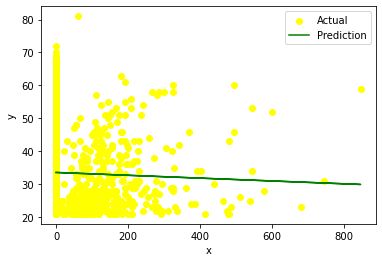

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('diabetes_csv.csv')

x = data['Insulin'].values.reshape(-1, 1)
y = data['Age'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

intercept = model.intercept_[0]
slope = model.coef_[0][0]
print('Intercept (B0):', intercept)
print('Slope (B1):', slope)

y_pred = model.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)

plt.scatter(x, y, color='yellow', label='Actual')
plt.plot(x, y_pred, color='green', label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
